# thal1 1-parameter Bifurcation Diagrams

Including trajectories over time

# Inits

In [1]:
import sys; sys.path.insert(0, '..') # add parent folder path where lib folder is
# user-defined
import nmCoupling as nm
# import nmCoupling_old as nm
import response as rp

import thal1 as t1
from lib.functions import g1,p

from lib.util import (get_phase, _get_sol,load_bif1d_f,load_phis_force, get_init_point_force, newton_iter_force)

from generate_figures import _full_thal1

from lib.rhs import _redu_c, _full, rhs_avg_1df
from lib.plot_util import add_diagram_1d

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sym

from scipy.optimize import root,bisect
from copy import deepcopy
import os

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

nmc = nm.nmCoupling
rsp = rp.Response

## Dicts

In [2]:
kw_sim = {'rtol':1e-6,'atol':1e-6,'method':'LSODA'}

In [3]:
pd1 = {'gL':0.05,'gna':3,'gk':5,
       'gt':5,'eL':-70,'ena':50,
       'ek':-90,'et':0,'esyn':-1,
       'c':1,'alpha':3,'beta':2,
       'sigmat':0.8,'vt':-20,
       'ib':8.5,'del':0,'om':1,'om_fix':1}

In [4]:
# default period must be 2*np.pi
kws1 = {'var_names':['v','h','r'],
        'pardict':pd1,
        'rhs':t1.rhs,
        #'forcing_fn':[lambda x: -np.cos(x),lambda x:20*np.cos(x+1)],
        'forcing_fn':[g1,lambda x:-20*g1(x+1)],
        'init':np.array([-.64,0.71,0,10.6]),
        'TN':20000,
        'trunc_order':1,
        'z_forward':False,
        'i_forward':False,
        'i_bad_dx':[False,True,False,False],
        'max_iter':20,
        'rtol':1e-12,
        'atol':1e-12,
        'rel_tol':1e-9,
        'save_fig':False,
        'lc_prominence':.05,
        'factor':1,
        'save_fig':True}

## Defs

In [5]:
kw_bif = {'method':'LSODA','dense_output':True,'rtol':1e-9,'atol':1e-9}

In [6]:
eps_list11r = np.linspace(0.001,.1,50)
etup11 = (.001,.1,50)

In [7]:
x_temp = np.linspace(-np.pi,3*np.pi,500)

## Initialize Response Functions

In [8]:
system1 = rsp(idx=0,model_name='thalf0',**kws1)

mkdir ./data/thalf0/
* Loading LC data...
self.T 6.283185307179586 omfix 0.9901981420040301
LC0 ini[-0.10742889  0.22848616  0.09385013]
LC0 fin[-0.10742888  0.22848617  0.09385012]
* Loading monodromy...
* Floquet Exponent kappa =-0.024354476053972264
* Loading g symbolic...
* Computing g...
g0 ini[0. 0. 0.]
g0 fin[0. 0. 0.]
g1 ini[-0.00392138  0.93590097  0.35224138]
g1 fin[-0.00392138  0.93590097  0.35224138]
* Loading heterogeneous terms...
* Computing z...
z0 ini[-0.86890695 -1.20965439  3.20436344]
z0 fin[-0.86890694 -1.20965437  3.20436339]
z1 ini[ 2.63290751  1.04789014 -0.20900062]
z1 fin[ 2.63290751  1.04789014 -0.20900062]
* Computing i...
i0 ini[ 0.14832161 -0.01130593  2.87065321]
i0 fin[ 0.14832161 -0.01130593  2.87065321]
i1 ini[-0.08308497  0.69291962 -0.06360566]
i1 fin[-0.08308503  0.69291955 -0.06360565]


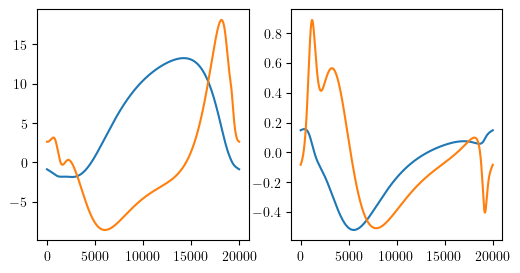

In [9]:
fig,axs = plt.subplots(1,2,figsize=(6,3))
for k in range(system1.miter):
    axs[0].plot(system1.z['dat'][k][:,0])

for k in range(system1.miter):
    axs[1].plot(system1.i['dat'][k][:,0])

# 1:1

In [10]:
recompute_list = ['h_data_thalf0','h_data_thalf0','p_data_thalf0','p_data_thalf0']
recompute_list = []
kw_11 = {'system1':system1,'system2':None,'_n':('om0',1),'_m':('om1',1),
         'NH':1024,'save_fig':False,'recompute_list':recompute_list}

## del=0.0

In [11]:
del11_p0 = 0.0
a11_p0 = nm.nmCoupling(**kw_11, del1=del11_p0)

u expr eps**2*f2 + eps*f1
tmp eps**3*f2*i_thalf0_v0[1]*p_thalf0[1] + eps**2*(f1*i_thalf0_v0[1]*p_thalf0[1] + f2*i_thalf0_v0[0]) + eps*f1*i_thalf0_v0[0]
p sym k 0
p sym k f_imp1(th1)*iv0_0(th0)
h sym 0 f_imp1(th1)*zv0_0(th0)
h sym 1 f_imp1(th1)*zv0_1(th0)*p_thalf0[1] + f_imp2(th1)*zv0_0(th0)
* Loading p...
* Loading H thalf0, order=0...
* Loading H thalf0, order=1...


### H functions

In [12]:
# aa = a11_p0
# fig,axs = plt.subplots(aa.system1.miter+1,1,figsize=(6,3))
# if aa.system1.miter == 1:
#     axs = np.asarray([axs])
# etemp = .1
# h = 0
# for k in range(aa.system1.miter):
#     axs[k].plot(aa.x,aa.system1.h['lam'][k](aa.x))
#     h += etemp**(k+1)*aa.system1.h['lam'][k](aa.x)

# axs[-1].plot(aa.x,h)
# plt.tight_layout()

### Plot 1par

In [13]:
etup = (.002,.075,.01)
atemp = a11_p0
dtemp = del11_p0
out = load_bif1d_f(_full_thal1,atemp,dtemp,etup=etup)

In [14]:
erange = out[:,0]
inits = out[:,1:]

In [15]:
philist = load_phis_force(_full_thal1,atemp,dtemp,etup=etup,period_multiple=10)

fname_inits /Users/youngmp/Library/CloudStorage/Dropbox-Personal/projects/nm_phase_locking/code_and_data/jupyter/bifdat/bif1_inits_thalf0_ratio=11_d=0.0_elo=0.002_ehi=0.075_de=0.01_phi0=0.txt


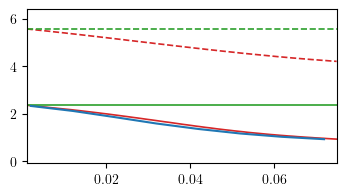

In [16]:
fig,axs = plt.subplots(figsize=(4,2))

add_diagram_1d(axs,atemp,dtemp,(.001,.075,200), rhs=rhs_avg_1df)
add_diagram_1d(axs,atemp,dtemp,(.001,.075,200), rhs=rhs_avg_1df, miter=1,color='tab:green')

axs.plot(erange,np.mod(-philist,2*np.pi))

### Sims

In [17]:
# coupling and init
eps11_p0 = .0225
th_init11_p0 = 4

In [18]:
# sim params
dt = .01;T_p0=1000
t11_p0 = np.arange(0,T_p0,dt)
args11_p0 = {'args':(a11_p0,eps11_p0,del11_p0),'t_eval':t11_p0,**kw_sim,'dense_output':True}

In [19]:
y0_p0 = a11_p0.system1.lc['dat'][int((th_init11_p0/(2*np.pi))*a11_p0.system1.TN),:]
args0 = [a11_p0,eps11_p0,del11_p0]

solf = _get_sol(_full_thal1,y0_p0,t11_p0,args=args0,recompute=False)        
tp,fp = get_phase(t11_p0,solf,skipn=100,system1=a11_p0.system1)
force_phase = (a11_p0._m[1]+del11_p0)*tp
fp2 = np.mod(fp-a11_p0.om*force_phase,2*np.pi)

args0 = [a11_p0,eps11_p0,del11_p0]
args1 = {'t_eval':t11_p0,'t_span':[0,t11_p0[-1]],'args':(*args0,),**kw_sim}
solr1d = solve_ivp(rhs_avg_1df,y0=[th_init11_p0],**args1)

args0 = [a11_p0,eps11_p0,del11_p0,1]
args1 = {'t_eval':t11_p0,'t_span':[0,t11_p0[-1]],'args':(*args0,),**kw_sim}

solr1d0 = solve_ivp(rhs_avg_1df,y0=[th_init11_p0],**args1)

### Sim plots

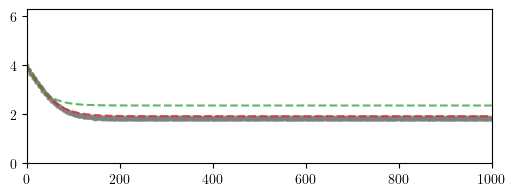

In [20]:
fig,axs = plt.subplots(1,1,figsize=(6,2))

# plot full sol
axs.scatter(tp,fp2,s=5,color='gray',alpha=.5,label='Full')
axs.set_ylim(0,2*np.pi)
axs.set_xlim(0,T_p0)

# 1d solution over time
axs.plot(t11_p0,np.mod(solr1d.y.T[:,0],2*np.pi),color='tab:red',alpha=.75,label='1D',ls='--')
axs.plot(t11_p0,np.mod(solr1d0.y.T[:,0],2*np.pi),color='tab:green',alpha=.75,label='1D',ls='--')

## del=0.04

In [21]:
del11_p1 = 0.04
a11_p1 = nm.nmCoupling(**kw_11, del1=del11_p1)

u expr eps**2*f2 + eps*f1
tmp eps**3*f2*i_thalf0_v0[1]*p_thalf0[1] + eps**2*(f1*i_thalf0_v0[1]*p_thalf0[1] + f2*i_thalf0_v0[0]) + eps*f1*i_thalf0_v0[0]
p sym k 0
p sym k f_imp1(th1)*iv0_0(th0)
h sym 0 f_imp1(th1)*zv0_0(th0)
h sym 1 f_imp1(th1)*zv0_1(th0)*p_thalf0[1] + f_imp2(th1)*zv0_0(th0)
* Loading p...
* Loading H thalf0, order=0...
* Loading H thalf0, order=1...


### H functions

In [22]:
# aa = a11_p1
# fig,axs = plt.subplots(aa.system1.miter+1,1,figsize=(6,3))
# axs = np.asarray(axs)
# etemp = .5
# h = 0
# for k in range(aa.system1.miter):
#     axs[k].plot(aa.x,aa.system1.h['lam'][k](aa.x))
#     h += etemp**(k+1)*aa.system1.h['lam'][k](aa.x)

# axs[-1].plot(h)

# plt.tight_layout()

### Plot 1par

In [23]:
etup = (.024,.075,.001)
atemp = a11_p1
dtemp = del11_p1
out = load_bif1d_f(_full_thal1,atemp,dtemp,etup=etup)

In [24]:
erange = out[:,0]
inits = out[:,1:]

In [25]:
philist = load_phis_force(_full_thal1,atemp,dtemp,etup=etup,period_multiple=10)

fname_inits /Users/youngmp/Library/CloudStorage/Dropbox-Personal/projects/nm_phase_locking/code_and_data/jupyter/bifdat/bif1_inits_thalf0_ratio=11_d=0.04_elo=0.024_ehi=0.075_de=0.001_phi0=0.txt


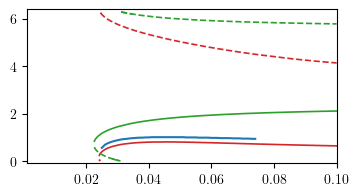

In [26]:
fig,axs = plt.subplots(figsize=(4,2))

add_diagram_1d(axs,atemp,dtemp,(.001,.1,500),rhs=rhs_avg_1df)
add_diagram_1d(axs,atemp,dtemp,(.001,.1,500), rhs=rhs_avg_1df, miter=1, color='tab:green')

axs.plot(erange,np.mod(-philist,2*np.pi))

### Sims

In [27]:
# coupling and init
eps11_p1 = 0.0225
th_init11_p1 = 4

In [28]:
# sim params
dt = .01;T_p050=1000
t11_p1 = np.arange(0,T_p050,dt)
args11_p1 = {'args':(a11_p1,eps11_p1,del11_p1),'t_eval':t11_p1,**kw_sim,'dense_output':True}

In [29]:
y0_p050 = a11_p1.system1.lc['dat'][int((th_init11_p1/(2*np.pi))*a11_p1.system1.TN),:]
args0 = [a11_p1,eps11_p1,del11_p1]

solf = _get_sol(_full_thal1,y0_p050,t11_p1,args=args0,recompute=False)        
tp,fp = get_phase(t11_p1,solf,skipn=100,system1=a11_p1.system1)
force_phase = (a11_p1._m[1]+del11_p1)*tp
fp2 = np.mod(fp-a11_p1.om*force_phase,2*np.pi)

args1 = {'t_eval':t11_p1,'t_span':[0,t11_p1[-1]],'args':(*args0,),**kw_sim}
solr1d = solve_ivp(rhs_avg_1df,y0=[th_init11_p1],**args1)

args0 = [a11_p1,eps11_p1,del11_p1,1]
args1 = {'t_eval':t11_p1,'t_span':[0,t11_p1[-1]],'args':(*args0,),**kw_sim}
solr1d0 = solve_ivp(rhs_avg_1df,y0=[th_init11_p1],**args1)

### Sim plots

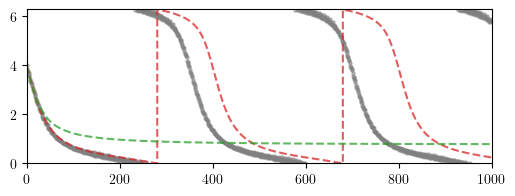

In [30]:
fig,axs = plt.subplots(1,1,figsize=(6,2))

# plot full sol
axs.scatter(tp,fp2,s=5,color='gray',alpha=.5,label='Full')
axs.set_ylim(0,2*np.pi)
axs.set_xlim(0,T_p050)

# 1d solution over time
axs.plot(t11_p1,np.mod(solr1d.y.T[:,0],2*np.pi),color='tab:red',alpha=.75,label='1D',ls='--')
axs.plot(t11_p1,np.mod(solr1d0.y.T[:,0],2*np.pi),color='tab:green',alpha=.75,label='1D',ls='--')

# 2:1

In [31]:
#recompute_list = ['h_data_cglf0','h_cglf0','p_cglf0','p_data_cglf0','k_cglf0','k_cglf1']
#recompute_list = []
kw_21 = {'system1':system1, 'system2':None, '_n':('om0',2),'_m':('om1',1), 'NH':1024, 'save_fig':False,  'recompute_list':recompute_list}

## del=0.0

In [32]:
del21_p0 = 0.0
a21_p0 = nm.nmCoupling(**kw_21, del1=del21_p0)

u expr eps**2*f2 + eps*f1
tmp eps**3*f2*i_thalf0_v0[1]*p_thalf0[1] + eps**2*(f1*i_thalf0_v0[1]*p_thalf0[1] + f2*i_thalf0_v0[0]) + eps*f1*i_thalf0_v0[0]
p sym k 0
p sym k f_imp1(th1)*iv0_0(th0)
h sym 0 f_imp1(th1)*zv0_0(th0)
h sym 1 f_imp1(th1)*zv0_1(th0)*p_thalf0[1] + f_imp2(th1)*zv0_0(th0)
* Loading p...
* Loading H thalf0, order=0...
* Loading H thalf0, order=1...


### H functions

In [33]:
# aa = a21_p0
# fig,axs = plt.subplots(aa.system1.miter,1,figsize=(6,3))
# etemp = .05
# h = 0
# for k in range(aa.system1.miter):
#     axs[k].plot(aa.x,etemp**(k+1)*aa.system1.h['lam'][k](aa.x))
    
# plt.tight_layout()

### Plot 1par

In [34]:
etup = (.002,.075,.01)
atemp = a21_p0
dtemp = del21_p0
out = load_bif1d_f(_full_thal1,atemp,dtemp,etup=etup,phi0=2,recompute=False)

In [35]:
erange = out[:,0]
inits = out[:,1:]

In [36]:
philist = load_phis_force(_full_thal1,atemp,dtemp,etup=etup,period_multiple=10,phi0=2,recompute=False)

fname_inits /Users/youngmp/Library/CloudStorage/Dropbox-Personal/projects/nm_phase_locking/code_and_data/jupyter/bifdat/bif1_inits_thalf0_ratio=21_d=0.0_elo=0.002_ehi=0.075_de=0.01_phi0=2.txt


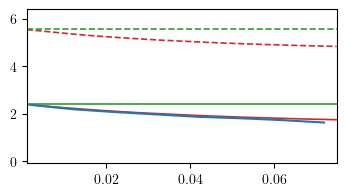

In [37]:
fig,axs = plt.subplots(figsize=(4,2))

add_diagram_1d(axs,atemp,dtemp, (.001,.075,200), rhs=rhs_avg_1df)
add_diagram_1d(axs,atemp,dtemp, (.001,.075,200), rhs=rhs_avg_1df, miter=1, color='tab:green')

axs.plot(erange,np.mod(-philist,2*np.pi))

### Sims

In [38]:
# coupling and init
eps21_p0 = 0.025
th_init21_p0 = 4

In [39]:
# sim params
dt = .01;T_p01=1000
t21_p0 = np.arange(0,T_p01,dt)
args21_p0 = {'args':(a21_p0,eps21_p0,del21_p0),'t_eval':t21_p0,**kw_sim,'dense_output':True}

In [40]:
y0_p01 = a21_p0.system1.lc['dat'][int((th_init21_p0/(2*np.pi))*a21_p0.system1.TN),:]
args0 = [a21_p0,eps21_p0,del21_p0]

solf = _get_sol(_full_thal1,y0_p01,t21_p0,args=args0,recompute=False)        
tp,fp = get_phase(t21_p0,solf,skipn=100,system1=a21_p0.system1)
force_phase = (a21_p0._m[1]+del21_p0)*tp
fp2 = np.mod(fp-a21_p0.om*force_phase,2*np.pi)

args1 = {'t_eval':t21_p0,'t_span':[0,t21_p0[-1]],'args':(*args0,),**kw_sim}
solr1d = solve_ivp(rhs_avg_1df,y0=[th_init21_p0],**args1)

args0 = [a21_p0,eps21_p0,del21_p0,1]
args1 = {'t_eval':t21_p0,'t_span':[0,t21_p0[-1]],'args':(*args0,),**kw_sim}
solr1d0 = solve_ivp(rhs_avg_1df,y0=[th_init21_p0],**args1)

### Sim plots

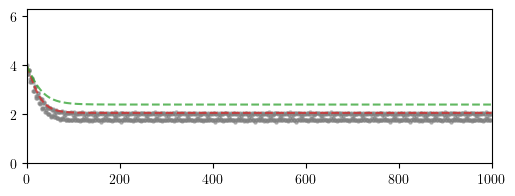

In [41]:
fig,axs = plt.subplots(1,1,figsize=(6,2))

# plot full sol
axs.scatter(tp,fp2,s=5,color='gray',alpha=.5,label='Full')
axs.set_ylim(0,2*np.pi)
axs.set_xlim(0,T_p01)

# 1d solution over time
axs.plot(t21_p0,np.mod(solr1d.y.T[:,0],2*np.pi),color='tab:red', alpha=.75,label='1D',ls='--')

axs.plot(t21_p0,np.mod(solr1d0.y.T[:,0],2*np.pi),color='tab:green', alpha=.75,label='1D',ls='--')

## del=0.025

In [42]:
del21_p1 = .025
a21_p1 = nm.nmCoupling(**kw_21, del1=del21_p1)

u expr eps**2*f2 + eps*f1
tmp eps**3*f2*i_thalf0_v0[1]*p_thalf0[1] + eps**2*(f1*i_thalf0_v0[1]*p_thalf0[1] + f2*i_thalf0_v0[0]) + eps*f1*i_thalf0_v0[0]
p sym k 0
p sym k f_imp1(th1)*iv0_0(th0)
h sym 0 f_imp1(th1)*zv0_0(th0)
h sym 1 f_imp1(th1)*zv0_1(th0)*p_thalf0[1] + f_imp2(th1)*zv0_0(th0)
* Loading p...
* Loading H thalf0, order=0...
* Loading H thalf0, order=1...


### H functions

In [43]:
# aa = a21_p1
# fig,axs = plt.subplots(aa.system1.miter+1,1,figsize=(6,3))
# etemp = .01
# h = 0
# for k in range(aa.system1.miter):
#     axs[k].plot(aa.x,etemp**(k+1)*aa.system1.h['lam'][k](aa.x))
#     h += etemp**(k+1)*aa.system1.h['lam'][k](aa.x)

# axs[-1].plot(h)
# plt.tight_layout()

### Plot 1par

In [44]:
etup = (.024,.075,.001)
atemp = a21_p1
dtemp = del21_p1
out = load_bif1d_f(_full_thal1,atemp,dtemp,etup=etup,phi0=2,recompute=False)

In [45]:
erange = out[:,0]
inits = out[:,1:]

In [46]:
philist = load_phis_force(_full_thal1, atemp, dtemp, etup=etup, period_multiple=10, phi0=2, recompute=False)

fname_inits /Users/youngmp/Library/CloudStorage/Dropbox-Personal/projects/nm_phase_locking/code_and_data/jupyter/bifdat/bif1_inits_thalf0_ratio=21_d=0.025_elo=0.024_ehi=0.075_de=0.001_phi0=2.txt


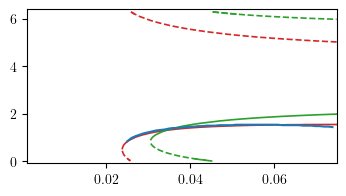

In [47]:
fig,axs = plt.subplots(figsize=(4,2))

add_diagram_1d(axs,a21_p1, del21_p1, (.001,.075,500), rhs=rhs_avg_1df)
add_diagram_1d(axs,a21_p1,del21_p1, (.001,.075,500), rhs=rhs_avg_1df, miter=1, color='tab:green')

axs.plot(erange,np.mod(-philist,2*np.pi))

### Sims

In [48]:
# coupling and init
eps21_p1 = 0.026
th_init21_p1 = 2

In [49]:
# sim params
dt = .01;T_p025=1000
t21_p1 = np.arange(0,T_p025,dt)
args21_p1 = {'args':(a21_p1,eps21_p1,del21_p1),'t_eval':t21_p1,**kw_sim,'dense_output':True}

In [50]:
y0_p025 = a21_p1.system1.lc['dat'][int((th_init21_p1/(2*np.pi))*a21_p1.system1.TN),:]
args0 = [a21_p1,eps21_p1,del21_p1]

solf = _get_sol(_full_thal1,y0_p025,t21_p1,args=args0,recompute=False)        
tp,fp = get_phase(t21_p1,solf,skipn=100,system1=a21_p1.system1)
force_phase = (a21_p1._m[1]+del21_p1)*tp
fp2 = np.mod(fp-a21_p1.om*force_phase,2*np.pi)

args1 = {'t_eval':t21_p1,'t_span':[0,t21_p1[-1]],'args':(*args0,),**kw_sim}
solr1d = solve_ivp(rhs_avg_1df,y0=[th_init21_p1],**args1)

args0 = [a21_p1,eps21_p1,del21_p1,1]
args1 = {'t_eval':t21_p1,'t_span':[0,t21_p1[-1]],'args':(*args0,),**kw_sim}
solr1d0 = solve_ivp(rhs_avg_1df,y0=[th_init21_p1],**args1)

### Sim plots

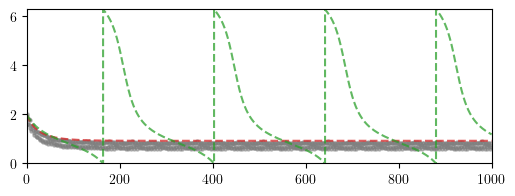

In [51]:
fig,axs = plt.subplots(1,1,figsize=(6,2))

# plot full sol
axs.scatter(tp,fp2,s=5,color='gray',alpha=.5,label='Full')
axs.set_ylim(0,2*np.pi)
axs.set_xlim(0,T_p025)

# 1d solution over time
axs.plot(t21_p1,np.mod(solr1d.y.T[:,0],2*np.pi),color='tab:red',alpha=.75,label='1D',ls='--')
axs.plot(t21_p1,np.mod(solr1d0.y.T[:,0],2*np.pi),color='tab:green',alpha=.75,label='1D',ls='--')

# 1:2

In [52]:
#recompute_list = ['h_data_cglf0','h_cglf0','p_cglf0','p_data_cglf0','k_cglf0','k_cglf1']
#recompute_list = []
kw_12 = {'system1':system1,'system2':None,'_n':('om0',1),'_m':('om1',2),
         'NH':1024,'save_fig':False,'recompute_list':recompute_list}

## del=0.0

In [53]:
del12_p0 = 0.0
a12_p0 = nm.nmCoupling(**kw_12, del1=del12_p0)

u expr eps**2*f2 + eps*f1
tmp eps**3*f2*i_thalf0_v0[1]*p_thalf0[1] + eps**2*(f1*i_thalf0_v0[1]*p_thalf0[1] + f2*i_thalf0_v0[0]) + eps*f1*i_thalf0_v0[0]
p sym k 0
p sym k f_imp1(th1)*iv0_0(th0)
h sym 0 f_imp1(th1)*zv0_0(th0)
h sym 1 f_imp1(th1)*zv0_1(th0)*p_thalf0[1] + f_imp2(th1)*zv0_0(th0)
* Loading p...
* Loading H thalf0, order=0...
* Loading H thalf0, order=1...


### H functions

In [54]:
# aa = a12_p0
# fig,axs = plt.subplots(aa.system1.miter,1,figsize=(6,3))
# etemp = .05
# h = 0
# for k in range(aa.system1.miter):
#     axs[k].plot(aa.x,etemp**(k+1)*aa.system1.h['lam'][k](aa.x))
    
# plt.tight_layout()

### Plot 1par

In [167]:
etup = (.002,.075,.01)
atemp = a12_p0
dtemp = del12_p0

In [168]:
out1 = load_bif1d_f(_full_thal1, atemp, dtemp, etup=etup, phi0=1, recompute=False,max_iter=100)
erange1 = out1[:,0]

In [169]:
philist1 = load_phis_force(_full_thal1,atemp,dtemp,etup=etup,period_multiple=10,recompute=False,phi0=1)

fname_inits /Users/youngmp/Library/CloudStorage/Dropbox-Personal/projects/nm_phase_locking/code_and_data/jupyter/bifdat/bif1_inits_thalf0_ratio=12_d=0.0_elo=0.002_ehi=0.075_de=0.01_phi0=1.txt


In [182]:
phi0 = 2
out2 = load_bif1d_f(_full_thal1, atemp, dtemp, etup=etup, phi0=phi0, recompute=True,max_iter=100)
erange2 = out2[:,0]

phi0 in run_bif1d_f 2
0, eps=0.002 [-0.55466271  0.14154056  0.09119556]
1, eps=0.012 [-0.53470165  0.12522141  0.09226633]
2, eps=0.022 [-0.49710004  0.10458732  0.09334946]
3, eps=0.032 [-0.4294466   0.08332126  0.0938824 ]
4, eps=0.042 [-0.3440849   0.07115859  0.09352202]
5, eps=0.052 [-0.27821517  0.07064873  0.09346676]
6, eps=0.062 [-0.23603994  0.07561235  0.09459369]
7, eps=0.072 [-0.2093806   0.08107432  0.09733697]


In [183]:
philist2 = load_phis_force(_full_thal1,atemp,dtemp,etup=etup,period_multiple=10,recompute=True,phi0=phi0)

fname_inits /Users/youngmp/Library/CloudStorage/Dropbox-Personal/projects/nm_phase_locking/code_and_data/jupyter/bifdat/bif1_inits_thalf0_ratio=12_d=0.0_elo=0.002_ehi=0.075_de=0.01_phi0=2.txt


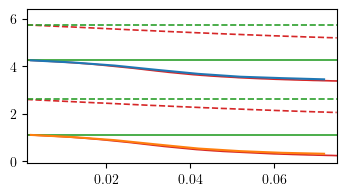

In [184]:
fig,axs = plt.subplots(figsize=(4,2))

add_diagram_1d(axs, atemp, dtemp, (.001,.075,200), rhs=rhs_avg_1df)
add_diagram_1d(axs, atemp, dtemp, (.001,.075,200), rhs=rhs_avg_1df, miter=1, color='tab:green')

axs.plot(erange1,np.mod(-philist1,2*np.pi))
axs.plot(erange2,np.mod(-philist2,2*np.pi))

### Sims

In [61]:
# coupling and init
eps12_p0 = 0.035
th_init12_p0 = 3

In [62]:
# sim params
dt = .01;T_p01=1000
t12_p0 = np.arange(0,T_p01,dt)
args12_p0 = {'args':(a12_p0,eps12_p0,del12_p0),'t_eval':t12_p0,**kw_sim,'dense_output':True}

In [63]:
y0_p01 = a12_p0.system1.lc['dat'][int((th_init12_p0/(2*np.pi))*a12_p0.system1.TN),:]
args0 = [a12_p0,eps12_p0,del12_p0]

solf = _get_sol(_full_thal1,y0_p01,t12_p0,args=args0,recompute=False)        
tp,fp = get_phase(t12_p0,solf,skipn=100,system1=a12_p0.system1)
force_phase = (a12_p0._m[1]+del12_p0)*tp
fp2 = np.mod(fp-a12_p0.om*force_phase,2*np.pi)

args1 = {'t_eval':t12_p0,'t_span':[0,t12_p0[-1]],'args':(*args0,),**kw_sim}
solr1d = solve_ivp(rhs_avg_1df,y0=[th_init12_p0],**args1)

args0 = [a12_p0,eps12_p0,del12_p0,1]
args1 = {'t_eval':t12_p0,'t_span':[0,t12_p0[-1]],'args':(*args0,),**kw_sim}
solr1d0 = solve_ivp(rhs_avg_1df,y0=[th_init12_p0],**args1)

### Sim plots

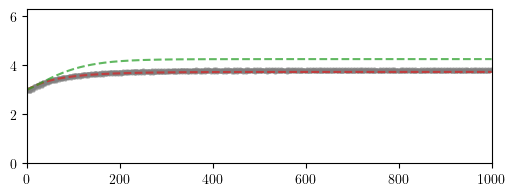

In [64]:
fig,axs = plt.subplots(1,1,figsize=(6,2))

# plot full sol
axs.scatter(tp,fp2,s=5,color='gray',alpha=.5,label='Full')
axs.set_ylim(0,2*np.pi)
axs.set_xlim(0,T_p01)

# 1d solution over time
axs.plot(t12_p0,np.mod(solr1d.y.T[:,0],2*np.pi),color='tab:red',alpha=.75,label='1D',ls='--')

axs.plot(t12_p0,np.mod(solr1d0.y.T[:,0],2*np.pi),color='tab:green',alpha=.75,label='1D',ls='--')

## del=0.02

In [87]:
del12_p1 = .02
a12_p1 = nm.nmCoupling(**kw_12, del1=del12_p1)

u expr eps**2*f2 + eps*f1
tmp eps**3*f2*i_thalf0_v0[1]*p_thalf0[1] + eps**2*(f1*i_thalf0_v0[1]*p_thalf0[1] + f2*i_thalf0_v0[0]) + eps*f1*i_thalf0_v0[0]
p sym k 0
p sym k f_imp1(th1)*iv0_0(th0)
h sym 0 f_imp1(th1)*zv0_0(th0)
h sym 1 f_imp1(th1)*zv0_1(th0)*p_thalf0[1] + f_imp2(th1)*zv0_0(th0)
* Loading p...
* Loading H thalf0, order=0...
* Loading H thalf0, order=1...


### H functions

In [88]:
# aa = a12_p1
# fig,axs = plt.subplots(aa.system1.miter+1,1,figsize=(6,3))
# etemp = .01
# h = 0
# for k in range(aa.system1.miter):
#     axs[k].plot(aa.x,etemp**(k+1)*aa.system1.h['lam'][k](aa.x))
#     h += etemp**(k+1)*aa.system1.h['lam'][k](aa.x)

# axs[-1].plot(h)
# plt.tight_layout()

### Plot 1par

In [189]:
etup = (.032,.075,.01)
atemp = a12_p1
dtemp = del12_p1

In [190]:
out1 = load_bif1d_f(_full_thal1, atemp, dtemp, etup=etup, phi0=1, recompute=False,max_iter=50)
erange1 = out1[:,0]

phi0 in run_bif1d_f 1
0, eps=0.032 [nan nan nan]
1, eps=0.042 [-0.11611534  0.18512052  0.08411571]
2, eps=0.052 [-0.13015747  0.14790847  0.08439589]
3, eps=0.062 [-0.13749996  0.13374039  0.08593514]
4, eps=0.072 [-0.14065813  0.12578617  0.08892374]


In [191]:
philist1 = load_phis_force(_full_thal1,atemp,dtemp,etup=etup,period_multiple=10,recompute=False,phi0=1)

fname_inits /Users/youngmp/Library/CloudStorage/Dropbox-Personal/projects/nm_phase_locking/code_and_data/jupyter/bifdat/bif1_inits_thalf0_ratio=12_d=0.02_elo=0.032_ehi=0.075_de=0.01_phi0=1.txt


In [198]:
phi0 = 4
out2 = load_bif1d_f(_full_thal1, atemp, dtemp, etup=etup, phi0=phi0, recompute=False,max_iter=50)
erange2 = out2[:,0]

phi0 in run_bif1d_f 4
0, eps=0.032 [nan nan nan]
1, eps=0.042 [-0.57492652  0.52316283  0.08897842]
2, eps=0.052 [-0.56519179  0.53110199  0.08968998]
3, eps=0.062 [-0.55631207  0.53562742  0.09161499]
4, eps=0.072 [-0.54694782  0.53965222  0.09507864]


In [199]:
philist2 = load_phis_force(_full_thal1, atemp, dtemp, etup=etup, period_multiple=10, recompute=False, phi0=phi0)

fname_inits /Users/youngmp/Library/CloudStorage/Dropbox-Personal/projects/nm_phase_locking/code_and_data/jupyter/bifdat/bif1_inits_thalf0_ratio=12_d=0.02_elo=0.032_ehi=0.075_de=0.01_phi0=4.txt


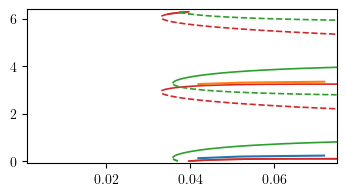

In [200]:
fig,axs = plt.subplots(figsize=(4,2))

add_diagram_1d(axs,atemp,dtemp, (.001,.075,200), rhs=rhs_avg_1df)
add_diagram_1d(axs,atemp,dtemp, (.001,.075,200), rhs=rhs_avg_1df, miter=1, color='tab:green')

axs.plot(erange1,np.mod(-philist1,2*np.pi))
axs.plot(erange2,np.mod(-philist2,2*np.pi))

### Sims

In [80]:
# coupling and init
eps12_p1 = 0.035
th_init12_p1 = 5

In [81]:
# sim params
dt = .01;T_p025=5000
t12_p1 = np.arange(0,T_p025,dt)
args12_p1 = {'args':(a12_p1,eps12_p1,del12_p1),'t_eval':t12_p1,**kw_sim,'dense_output':True}

In [82]:
y0_p025 = a12_p1.system1.lc['dat'][int((th_init12_p1/(2*np.pi))*a12_p1.system1.TN),:]
args0 = [a12_p1,eps12_p1,del12_p1]

solf = _get_sol(_full_thal1,y0_p025,t12_p1,args=args0,recompute=False)        
tp,fp = get_phase(t12_p1,solf,skipn=100,system1=a12_p1.system1)
force_phase = (a12_p1._m[1]+del12_p1)*tp
fp2 = np.mod(fp-a12_p1.om*force_phase,2*np.pi)

args1 = {'t_eval':t12_p1,'t_span':[0,t12_p1[-1]],'args':(*args0,),**kw_sim}
solr1d = solve_ivp(rhs_avg_1df,y0=[th_init12_p1],**args1)

print('args1',args1)

args0 = [a12_p1,eps12_p1,del12_p1,1]
args1 = {'t_eval':t12_p1,'t_span':[0,t12_p1[-1]],'args':(*args0,),**kw_sim}
solr1d0 = solve_ivp(rhs_avg_1df,y0=[th_init12_p1],**args1)

args1 {'t_eval': array([0.00000e+00, 1.00000e-02, 2.00000e-02, ..., 4.99997e+03, 4.99998e+03, 4.99999e+03]), 't_span': [0, 4999.99], 'args': (<nmCoupling.nmCoupling object at 0x16cc92110>, 0.035, 0.02), 'rtol': 1e-06, 'atol': 1e-06, 'method': 'LSODA'}


### Sim plots

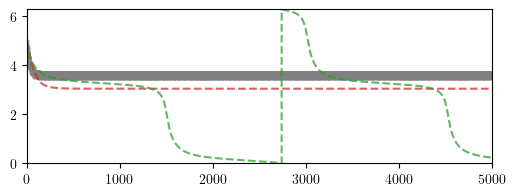

In [83]:
fig,axs = plt.subplots(1,1,figsize=(6,2))

# plot full sol
axs.scatter(tp,fp2,s=5,color='gray',alpha=.5,label='Full')
axs.set_ylim(0,2*np.pi)
axs.set_xlim(0,T_p025)

# 1d solution over time
axs.plot(t12_p1,np.mod(solr1d.y.T[:,0],2*np.pi),color='tab:red',alpha=.75,label='1D',ls='--')
axs.plot(t12_p1,np.mod(solr1d0.y.T[:,0],2*np.pi),color='tab:green',alpha=.75,label='1D',ls='--')

# 2:3

In [142]:
#recompute_list = ['h_data_cglf0','h_cglf0','p_cglf0','p_data_cglf0','k_cglf0','k_cglf1']
#recompute_list = []
kw_23 = {'system1':system1,'system2':None,'_n':('om0',2),'_m':('om1',3),
         'NH':1024,'save_fig':False,'recompute_list':recompute_list}

## del=0.0

In [143]:
del23_p0 = 0.0
a23_p0 = nm.nmCoupling(**kw_23, del1=del23_p0)

u expr eps**2*f2 + eps*f1
tmp eps**3*f2*i_thalf0_v0[1]*p_thalf0[1] + eps**2*(f1*i_thalf0_v0[1]*p_thalf0[1] + f2*i_thalf0_v0[0]) + eps*f1*i_thalf0_v0[0]
p sym k 0
p sym k f_imp1(th1)*iv0_0(th0)
h sym 0 f_imp1(th1)*zv0_0(th0)
h sym 1 f_imp1(th1)*zv0_1(th0)*p_thalf0[1] + f_imp2(th1)*zv0_0(th0)
* Loading p...
* Loading H thalf0, order=0...
* Loading H thalf0, order=1...


### H functions

In [144]:
# aa = a23_p0
# fig,axs = plt.subplots(aa.system1.miter,1,figsize=(6,3))
# etemp = .05
# h = 0
# for k in range(aa.system1.miter):
#     axs[k].plot(aa.x,etemp**(k+1)*aa.system1.h['lam'][k](aa.x))
    
# plt.tight_layout()

### Plot 1par

In [145]:
etup = (.002,.0501,.001)
atemp = a23_p0
dtemp = del23_p0
erange = np.arange(*etup)

In [146]:
phi0 = 4

out1 = load_bif1d_f(_full_thal1, atemp, dtemp, etup=etup, phi0=phi0, recompute=False,max_iter=50)
philist1 = load_phis_force(_full_thal1, atemp, dtemp, etup=etup, period_multiple=10, recompute=False, phi0=phi0)

fname_inits /Users/youngmp/Library/CloudStorage/Dropbox-Personal/projects/nm_phase_locking/code_and_data/jupyter/bifdat/bif1_inits_thalf0_ratio=23_d=0.0_elo=0.002_ehi=0.0501_de=0.001_phi0=4.txt


In [147]:
phi0 = 6
out2 = load_bif1d_f(_full_thal1, atemp, dtemp, etup=etup, phi0=phi0, recompute=False,max_iter=50)
philist2 = load_phis_force(_full_thal1, atemp, dtemp, etup=etup, period_multiple=10, recompute=False, phi0=phi0)

fname_inits /Users/youngmp/Library/CloudStorage/Dropbox-Personal/projects/nm_phase_locking/code_and_data/jupyter/bifdat/bif1_inits_thalf0_ratio=23_d=0.0_elo=0.002_ehi=0.0501_de=0.001_phi0=6.txt


In [148]:
phi0 = 2

out3 = load_bif1d_f(_full_thal1, atemp, dtemp, etup=etup, phi0=phi0, recompute=False,max_iter=50)
philist3 = load_phis_force(_full_thal1, atemp, dtemp, etup=etup, period_multiple=10, recompute=False, phi0=phi0)

fname_inits /Users/youngmp/Library/CloudStorage/Dropbox-Personal/projects/nm_phase_locking/code_and_data/jupyter/bifdat/bif1_inits_thalf0_ratio=23_d=0.0_elo=0.002_ehi=0.0501_de=0.001_phi0=2.txt


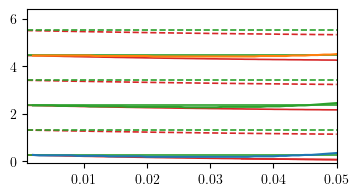

In [149]:
fig,axs = plt.subplots(figsize=(4,2))

add_diagram_1d(axs,atemp,dtemp, (.001,.05,200), rhs=rhs_avg_1df)
add_diagram_1d(axs,atemp,dtemp, (.001,.05,200), rhs=rhs_avg_1df,miter=1, color='tab:green')

axs.plot(erange,np.mod(-philist1,2*np.pi))
axs.plot(erange,np.mod(-philist2,2*np.pi))
axs.plot(erange,np.mod(-philist3,2*np.pi))

### Sims

In [123]:
# coupling and init
eps23_p0 = 0.04
th_init23_p0 = 5

In [124]:
# sim params
dt = .01;T_p01=1000
t23_p0 = np.arange(0,T_p01,dt)
args23_p0 = {'args':(a23_p0,eps23_p0,del23_p0),'t_eval':t23_p0,**kw_sim,'dense_output':True}

In [127]:
y0_p01 = a23_p0.system1.lc['dat'][int((th_init23_p0/(2*np.pi))*a23_p0.system1.TN),:]
args0 = [a23_p0,eps23_p0,del23_p0]

solf = _get_sol(_full_thal1,y0_p01,t23_p0,args=args0,recompute=False)        
tp,fp = get_phase(t23_p0,solf,skipn=100,system1=a23_p0.system1)
force_phase = (a23_p0._m[1]+del23_p0)*tp
fp2 = np.mod(fp-a23_p0.om*force_phase,2*np.pi)

args1 = {'t_eval':t23_p0,'t_span':[0,t23_p0[-1]],'args':(*args0,),**kw_sim}
solr1d = solve_ivp(rhs_avg_1df,y0=[th_init23_p0],**args1)

args0 = [a23_p0,eps23_p0,del23_p0,1]
args1 = {'t_eval':t23_p0,'t_span':[0,t23_p0[-1]],'args':(*args0,),**kw_sim}
solr1d0 = solve_ivp(rhs_avg_1df,y0=[th_init23_p0],**args1)

### Sim plots

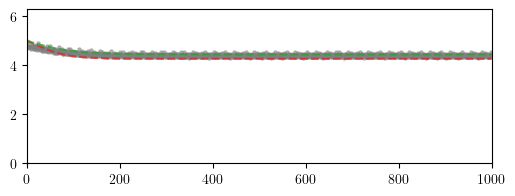

In [128]:
fig,axs = plt.subplots(1,1,figsize=(6,2))

# plot full sol
axs.scatter(tp,fp2,s=5,color='gray',alpha=.5,label='Full')
axs.set_ylim(0,2*np.pi)
axs.set_xlim(0,T_p01)

# 1d solution over time
axs.plot(t23_p0,np.mod(solr1d.y.T[:,0],2*np.pi),color='tab:red',alpha=.75,label='1D',ls='--')
axs.plot(t23_p0,np.mod(solr1d0.y.T[:,0],2*np.pi),color='tab:green',alpha=.75,label='1D',ls='--')

## del=0.005

In [132]:
del23_p1 = .005
a23_p1 = nm.nmCoupling(**kw_23, del1=del23_p1)

u expr eps**2*f2 + eps*f1
tmp eps**3*f2*i_thalf0_v0[1]*p_thalf0[1] + eps**2*(f1*i_thalf0_v0[1]*p_thalf0[1] + f2*i_thalf0_v0[0]) + eps*f1*i_thalf0_v0[0]
p sym k 0
p sym k f_imp1(th1)*iv0_0(th0)
h sym 0 f_imp1(th1)*zv0_0(th0)
h sym 1 f_imp1(th1)*zv0_1(th0)*p_thalf0[1] + f_imp2(th1)*zv0_0(th0)
* Loading p...
p order=0
* Computing H thalf0, order=0...
p order=1
system1 p f_imp1(th1)*iv0_0(th0) k= 1
* Computing H thalf0, order=1...


### H functions

In [133]:
# aa = a23_p1
# fig,axs = plt.subplots(aa.system1.miter+1,1,figsize=(6,3))
# etemp = .01
# h = 0
# for k in range(aa.system1.miter):
#     axs[k].plot(aa.x,etemp**(k+1)*aa.system1.h['lam'][k](aa.x))
#     h += etemp**(k+1)*aa.system1.h['lam'][k](aa.x)

# axs[-1].plot(h)
# plt.tight_layout()

### Plot 1par

In [162]:
etup = (.016,.0501,.001)
atemp = a23_p1
dtemp = del23_p1
erange = np.arange(*etup)

In [163]:
phi0 = 4
out1 = load_bif1d_f(_full_thal1, atemp, dtemp, etup=etup, phi0=phi0, recompute=False,max_iter=50)
philist1 = load_phis_force(_full_thal1, atemp, dtemp, etup=etup, period_multiple=10, recompute=False, phi0=phi0)

phi0 in run_bif1d_f 4
0, eps=0.016 [nan nan nan]
1, eps=0.017 [-0.53674328  0.59926657  0.09969363]
2, eps=0.018 [-0.53275777  0.60276483  0.09950528]
3, eps=0.019 [-0.52988556  0.60500633  0.09936671]
4, eps=0.020 [-0.52756655  0.60663424  0.09925407]
5, eps=0.021 [-0.5255893   0.60788813  0.09915828]
6, eps=0.022 [-0.52384518  0.60888925  0.09907462]
7, eps=0.023 [-0.52226908  0.60970916  0.09900021]
8, eps=0.024 [-0.52081806  0.61039432  0.09893311]
9, eps=0.025 [-0.51946186  0.61097697  0.0988719 ]
10, eps=0.026 [-0.5181782   0.61148048  0.09881552]
11, eps=0.027 [-0.51694999  0.61192258  0.09876311]
12, eps=0.028 [-0.51576374  0.61231706  0.09871398]
13, eps=0.029 [-0.51460852  0.61267497  0.09866751]
14, eps=0.030 [-0.51347533  0.61300535  0.0986232 ]
15, eps=0.031 [-0.5123566   0.61331575  0.09858056]
16, eps=0.032 [-0.51124576  0.61361264  0.09853917]
17, eps=0.033 [-0.51013718  0.61390163  0.09849861]
18, eps=0.034 [-0.50902584  0.61418767  0.0984585 ]
19, eps=0.035 [-0.507907

In [164]:
phi0 = 6
out2 = load_bif1d_f(_full_thal1, atemp, dtemp, etup=etup, phi0=phi0, recompute=False,max_iter=50)
philist2 = load_phis_force(_full_thal1, atemp, dtemp, etup=etup, period_multiple=10, recompute=False, phi0=phi0)

phi0 in run_bif1d_f 6
0, eps=0.016 [nan nan nan]
1, eps=0.017 [-0.6294433   0.29479588  0.09335743]
2, eps=0.018 [-0.63044352  0.30616119  0.09351596]
3, eps=0.019 [-0.63089361  0.31372148  0.09361085]
4, eps=0.020 [-0.63110544  0.31937979  0.09367166]
5, eps=0.021 [-0.63118448  0.32385392  0.0937102 ]
6, eps=0.022 [-0.63117884  0.32751169  0.0937328 ]
7, eps=0.023 [-0.63111388  0.3305726   0.09374337]
8, eps=0.024 [-0.63100415  0.33318053  0.09374451]
9, eps=0.025 [-0.63085844  0.33543629  0.0937381 ]
10, eps=0.026 [-0.63068221  0.33741386  0.0937255 ]
11, eps=0.027 [-0.63047887  0.33916965  0.09370774]
12, eps=0.028 [-0.63025056  0.34074794  0.09368563]
13, eps=0.029 [-0.62999848  0.34218443  0.09365979]
14, eps=0.030 [-0.62972328  0.34350858  0.09363073]
15, eps=0.031 [-0.62942512  0.34474516  0.09359883]
16, eps=0.032 [-0.62910381  0.34591546  0.09356439]
17, eps=0.033 [-0.62875891  0.34703801  0.09352768]
18, eps=0.034 [-0.62838973  0.3481294   0.09348887]
19, eps=0.035 [-0.627995

In [165]:
phi0 = 2
out3 = load_bif1d_f(_full_thal1, atemp, dtemp, etup=etup, phi0=phi0, recompute=False,max_iter=50)
philist3 = load_phis_force(_full_thal1, atemp, dtemp, etup=etup, period_multiple=10, recompute=False, phi0=phi0)

phi0 in run_bif1d_f 2
0, eps=0.016 [nan nan nan]
1, eps=0.017 [-0.20044248  0.49033807  0.09592809]
2, eps=0.018 [-0.16252797  0.42068054  0.09565901]
3, eps=0.019 [-0.1416592   0.37320012  0.0954756 ]
4, eps=0.020 [-0.12899995  0.33877068  0.09533426]
5, eps=0.021 [-0.12096481  0.31260745  0.09521858]
6, eps=0.022 [-0.11575993  0.29200802  0.09512015]
7, eps=0.023 [-0.11238158  0.27533375  0.09503391]
8, eps=0.024 [-0.11022647  0.2615304   0.09495649]
9, eps=0.025 [-0.1089137   0.24988655  0.09488549]
10, eps=0.026 [-0.10819403  0.23990249  0.0948191 ]
11, eps=0.027 [-0.10790026  0.23121594  0.09475588]
12, eps=0.028 [-0.10791823  0.22355781  0.09469466]
13, eps=0.029 [-0.10816913  0.21672198  0.09463445]
14, eps=0.030 [-0.10859849  0.21054835  0.09457436]
15, eps=0.031 [-0.10916883  0.2049104   0.09451361]
16, eps=0.032 [-0.10985494  0.1997062   0.09445146]
17, eps=0.033 [-0.11064061  0.19485238  0.09438721]
18, eps=0.034 [-0.11151641  0.19028014  0.09432018]
19, eps=0.035 [-0.112478

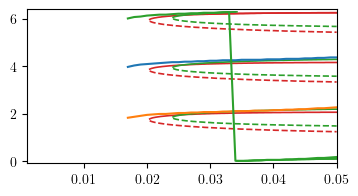

In [166]:
fig,axs = plt.subplots(figsize=(4,2))

add_diagram_1d(axs, a23_p1, del23_p1,(.001,.05,200), rhs=rhs_avg_1df)
add_diagram_1d(axs, a23_p1, del23_p1,(.001,.05,200), rhs=rhs_avg_1df, miter=1, color='tab:green')

axs.plot(erange,np.mod(-philist1,2*np.pi))
axs.plot(erange,np.mod(-philist2,2*np.pi))
axs.plot(erange,np.mod(-philist3,2*np.pi))

### Sims

In [135]:
# coupling and init
eps23_p1 = 0.022
th_init23_p1 = 4

In [139]:
# sim params
dt = .01;T_p025=2000
t23_p1 = np.arange(0,T_p025,dt)
args23_p1 = {'args':(a23_p1,eps23_p1,del23_p1),'t_eval':t23_p1,**kw_sim,'dense_output':True}

In [140]:
y0_p025 = a23_p1.system1.lc['dat'][int((th_init23_p1/(2*np.pi))*a23_p1.system1.TN),:]
args0 = [a23_p1,eps23_p1,del23_p1]

solf = _get_sol(_full_thal1,y0_p025,t23_p1,args=args0,recompute=False)        
tp,fp = get_phase(t23_p1,solf,skipn=100,system1=a23_p1.system1)
force_phase = (a23_p1._m[1]+del23_p1)*tp
fp2 = np.mod(fp-a23_p1.om*force_phase,2*np.pi)

args1 = {'t_eval':t23_p1,'t_span':[0,t23_p1[-1]],'args':(*args0,),**kw_sim}
solr1d = solve_ivp(rhs_avg_1df,y0=[th_init23_p1],**args1)

args0 = [a23_p1,eps23_p1,del23_p1,1]
args1 = {'t_eval':t23_p1,'t_span':[0,t23_p1[-1]],'args':(*args0,),**kw_sim}
solr1d0 = solve_ivp(rhs_avg_1df,y0=[th_init23_p1],**args1)

### Sim plots

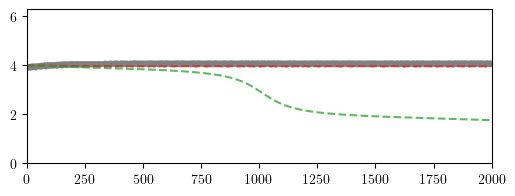

In [141]:
fig,axs = plt.subplots(1,1,figsize=(6,2))

# plot full sol
axs.scatter(tp,fp2,s=5,color='gray',alpha=.5,label='Full')
axs.set_ylim(0,2*np.pi)
axs.set_xlim(0,T_p025)

# 1d solution over time
axs.plot(t23_p1,np.mod(solr1d.y.T[:,0],2*np.pi),color='tab:red',alpha=.75,label='1D',ls='--')
axs.plot(t23_p1,np.mod(solr1d0.y.T[:,0],2*np.pi),color='tab:green',alpha=.75,label='1D',ls='--')